### Try & error in TA

#### Data process reference

In [ ]:
 !pip install emoji==1.7.0

In [ ]:
import requests
import json
import pandas as pd
import time
#import schedule
from datetime import datetime
import emoji
import string
import re
import time
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# To change str to dif format
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
start_time = time.time()
test_instance.prepare()
#test_instance.feature_generation()
test_instance.pre_processing()
print("--- %s seconds ---" % (time.time() - start_time))

--- 26.387792587280273 seconds ---


#### Upload data


In [1]:
AAPL = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/AAPL_pre_processed.csv',usecols=['body_preprocessed','sentiment'])

NameError: ignored

In [ ]:
AMZN = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/AMZN_pre_processed.csv',usecols=['body_preprocessed','sentiment'])

In [ ]:
FB = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/FB_pre_processed.csv',usecols=['body_preprocessed','sentiment'])

In [ ]:
NVDA = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/NVDA_pre_processed.csv',usecols=['body_preprocessed','sentiment'])

In [ ]:
TSLA = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/TSLA_pre_processed.csv',usecols=['body_preprocessed','sentiment'])

In [ ]:
AAPL['sentiment'].unique()

array([nan, 'Bullish', 'Bearish'], dtype=object)

#### tokenize - cleaning - freq_count

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import nltk
wnl = WordNetLemmatizer()

In [ ]:
punctuation = word_tokenize(string.punctuation) + ['...','.',"'s",'-','’']

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english') + ['cashtag_AAPL','I',"'s",'day','today','get',"n't",'stock']
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
AAPL_bear_token_list = []
for i in range(len(bear_list)):
  AAPL_bear_token_list = word_tokenize(bear_list[i])

In [ ]:
for i in range(len(AAPL_bear_token_list)):
  AAPL_bear_token_list[i]

In [ ]:
bear_list2 = pd.DataFrame(bear_list)

In [ ]:
def pre_process(text):
  tokens = nltk.word_tokenize(text)
  tokens = [wnl.lemmatize(word) for word in tokens]
  #tokens = ((wnl.lemmatize(word) for word in t) for t in tokens)
  tokens = [t for t in tokens if t not in stop] 
  tokens = [t for t in tokens if t not in punctuation]
  return(tokens)

In [ ]:
# use func to tokenize,lemmatize,stop-remove,punctuation-remove
test_processed = AAPL['body_preprocessed'].apply(lambda x: pre_process(x))

In [ ]:
# get rid of brackets inside list
# Noted: extend() just add-in
test_processed_new = []
for i in range(len(test_processed)):
  test_processed_new.extend(t for t in test_processed[i])

In [ ]:
fd = nltk.FreqDist(test_processed_new)

In [ ]:
print(fd.most_common(30))

[('cashtag_SPY', 98540), ('Apple', 85382), ('cashtag_TSLA', 72613), ('stock', 54863), ('market', 54835), ('cashtag_AMZN', 49796), ('like', 48137), ('buy', 46266), ('week', 45935), ('go', 45025), ('call', 44588), ('rocket', 43149), ('going', 41804), ('cashtag_MSFT', 37798), ('wa', 37484), ('The', 37206), ('time', 36182), ('see', 35710), ('back', 33847), ('cashtag_QQQ', 33785), ('ha', 33692), ('tomorrow', 32506), ('green_apple', 32231), ('next', 30891), ('quot', 30844), ("n't", 30160), ('bear', 28561), ('share', 27780), ('amp', 27705), ('put', 27361)]


 For AAPL twints:
   ('cashtag_SPY', 98680),('cashtag_TSLA', 72682),('cashtag_AMZN', 49870),('cashtag_MSFT', 37856),('cashtag_QQQ', 33812),

#### Text process for category [nan, 'Bullish', 'Bearish']

##### Sentiment categorize

In [ ]:
from numpy import nan
bull_twit = []
bear_list = []
non_list = []
for i in range(len(AAPL['sentiment'].index)):
  if AAPL['sentiment'][i] == 'Bullish': bull_twit.append(AAPL['body_preprocessed'][i])
  elif AAPL['sentiment'][i] == 'Bearish': bear_list.append(AAPL['body_preprocessed'][i])
  else:
    non_list.append(AAPL['body_preprocessed'][i])


In [ ]:
def pre_process_list(text):
  tokens = nltk.word_tokenize(text)
  tokens = [wnl.lemmatize(word) for word in tokens]
  #tokens = ((wnl.lemmatize(word) for word in t) for t in tokens)
  tokens = [t for t in tokens if t not in stop] 
  tokens = [t for t in tokens if t not in punctuation]
  return(tokens)

In [ ]:
df = AMZN

In [ ]:
bull_list = df[df['sentiment'] == 'Bullish']

In [ ]:
bear_list = df[df['sentiment'] == 'Bearish']

In [ ]:
non_list = df.loc[(df['sentiment'] != 'Bullish') & (df['sentiment'] != 'Bearish')]

In [ ]:
bear_list[:5]

,body_preprocessed,sentiment
5,cashtag_AMZN waiting for this to be bought bac...,Bearish
12,cashtag_SPY cashtag_FB cashtag_AMZN cashtag_GO...,Bearish
26,cashtag_FB cashtag_GOOGL cashtag_AMZN Not a on...,Bearish
43,cashtag_SPY cashtag_FB cashtag_AMZN cashtag_GO...,Bearish
48,cashtag_AMZN this is timed people (2days befor...,Bearish


In [ ]:
bear_list_processed = bear_list['body_preprocessed'].apply(lambda x: pre_process_list(x))

In [ ]:
bear_list_processed = bear_list_processed.values.tolist()

In [ ]:
bear_list_processed_onelist = []
for i in range(len(bear_list_processed)):
  bear_list_processed_onelist.extend(t for t in bear_list_processed[i])

In [ ]:
fd = nltk.FreqDist(bear_list_processed_onelist)

In [ ]:
fd_top10 = nltk.FreqDist(bear_list_processed_onelist).most_common(10)

In [ ]:
print(fd.most_common(10)) 

[('cashtag_SPY', 18307), ('market', 7958), ('cashtag_TSLA', 7902), ('put', 7148), ('cashtag_QQQ', 6759), ('going', 6585), ('stock', 5829), ('go', 5733), ('like', 5660), ('bull', 5658), ('cashtag_AMZN', 5569), ('week', 5522), ('Apple', 5495), ('tomorrow', 5124), ('buy', 4695), ('see', 4386), ('sell', 4360), ('back', 4349), ('time', 4253), ('short', 4092), ('next', 4083), ('cashtag_MSFT', 3992), ('face_with_tears_of_joy', 3986), ('wa', 3906), ('money', 3616), ('The', 3568), ("n't", 3535), ('This', 3289), ('call', 3284), ('ha', 3191)]


In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
import matplotlib.pyplot as plt
import seaborn as sns

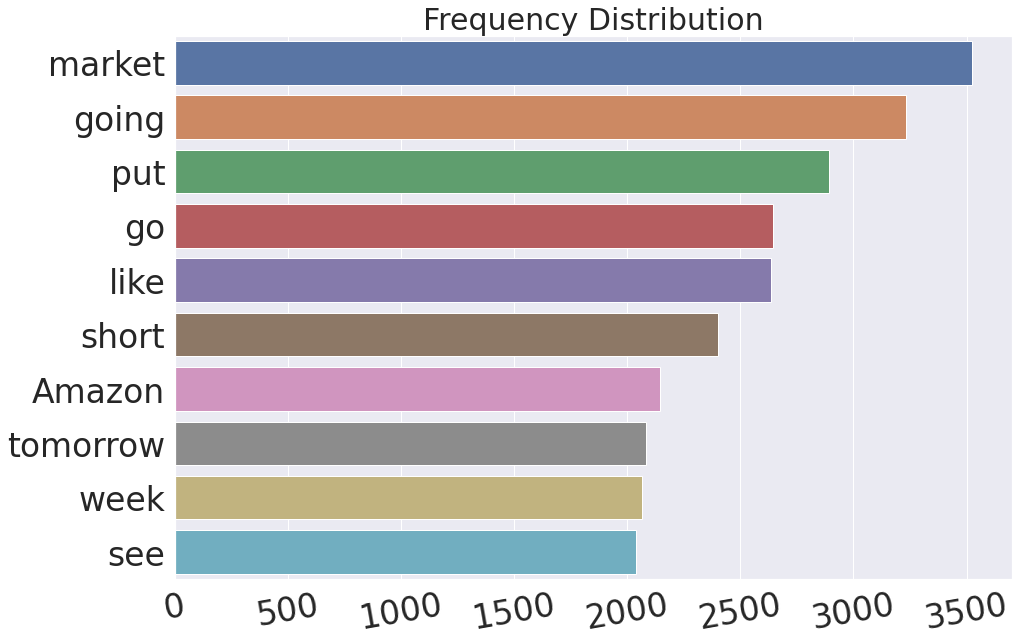

In [ ]:
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(fd_top10))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,10))

#increase font size of all elements
sns.set(font_scale=2)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, orient='h', ax=ax)
plt.xticks(rotation=10)
plt.title('Frequency Distribution', fontsize=30)
plt.show();

In [ ]:
fd_top10

[('market', 3524),
 ('going', 3233),
 ('put', 2892),
 ('go', 2644),
 ('like', 2636),
 ('short', 2402),
 ('Amazon', 2146),
 ('tomorrow', 2081),
 ('week', 2067),
 ('see', 2040)]

In [ ]:
## Creating FreqDist
ngram_fd = fd_top10

## Sort values by highest frequency
ngram_sorted = {k:v for k,v in sorted(ngram_fd.items(), key=lambda item:item[1], reverse=reverse_sort)}

## Join bigram tokens with '_' + maintain sorting
ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd.items(), key=lambda item:item[1], reverse=reverse_sort)}

## Convert to Pandas series for easy plotting
ngram_freqdist = pd.Series(ngram_joined)

## Setting figure & ax for plots
fig, ax = plt.subplots(figsize=(10,10))

## Setting plot to horizontal for easy viewing + setting title + display  
bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax)
plt.title('Frequency Distribution')
plt.show();

In [ ]:
  # Conversion to Pandas series via Python Dictionary for easier plotting
  all_fdist_bear = pd.Series(dict(fd_bear_visual))
  all_fdist_bull = pd.Series(dict(fd_bull_visual))

  # Setting figure, ax into variables
  fig1, ax1 = plt.subplots(figsize=(10,10))
  fig2, ax2 = plt.subplots(figsize=(10,10))

  # Increase font size of all elements
  sns.set(font_scale=2)

  # Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
  all_plot = sns.barplot(x=all_fdist_bear.values, y=all_fdist_bear.index, orient='h', ax=ax1)
  #plt.xticks(rotation=10)
  #plt.title('Frequency Distribution (Bear)', fontsize=30)
  #plt.show();

  all_plot = sns.barplot(x=all_fdist_bull.values, y=all_fdist_bull.index, orient='h', ax=ax2)
  plt.xticks(rotation=10)
  #plt.title('Frequency Distribution (Bull)', fontsize=30)
  #plt.show();

  # Generate 2 plot at once
  (fig1, fig2), (ax1, ax2) = plt.subplots(1, 2)
  plt.subplots(figsize=(10,10))
  fig1.suptitle('Frequency Distribution (Bear)')
  fig2.suptitle('Frequency Distribution (Bull)')
  ax1.plot(x, y)
  ax2.plot(x, -y)

##### Bear list frequency

In [ ]:
def pre_process_list(text):
  tokens = nltk.word_tokenize(text)
  tokens = [wnl.lemmatize(word) for word in tokens]
  #tokens = ((wnl.lemmatize(word) for word in t) for t in tokens)
  tokens = [t for t in tokens if t not in stop] 
  tokens = [t for t in tokens if t not in punctuation]
  return(tokens)

In [ ]:
len(bear_list)

107549

In [ ]:
bear_list_processed = []
for i in range(len(bear_list)):
  bear_list_processed.append(pre_process_list(bear_list[i]))

In [ ]:
bear_list_processed_onelist = []
for i in range(len(bear_list_processed)):
  bear_list_processed_onelist.extend(t for t in bear_list_processed[i])

In [ ]:
bear_list_processed_onelist[:50]

In [ ]:
fd = nltk.FreqDist(bear_list_processed_onelist)

In [ ]:
print(fd.most_common(30))       
# 4% ('face_with_tears_of_joy', 3986)
# cashtag_SPY cashtag_TSLA cashtag_QQQ cashtag_AMZN,cashtag_MSFT
# put,bull,week,buy,sell,short,wa,call,ha
# "buy, call, wa, ha" are not good feature 

[('cashtag_SPY', 18307), ('market', 7958), ('cashtag_TSLA', 7902), ('put', 7148), ('cashtag_QQQ', 6759), ('going', 6585), ('stock', 5829), ('go', 5733), ('like', 5660), ('bull', 5658), ('cashtag_AMZN', 5569), ('week', 5522), ('Apple', 5495), ('tomorrow', 5124), ('buy', 4695), ('see', 4386), ('sell', 4360), ('back', 4349), ('time', 4253), ('short', 4092), ('next', 4083), ('cashtag_MSFT', 3992), ('face_with_tears_of_joy', 3986), ('wa', 3906), ('money', 3616), ('The', 3568), ("n't", 3535), ('This', 3289), ('call', 3284), ('ha', 3191)]


##### Bull list frequency

In [ ]:
bull_twit_processed = []
for i in range(len(bull_twit)):
  bull_twit_processed.append(pre_process_list(bull_twit[i]))

In [ ]:
bull_list_processed_onelist = []
for i in range(len(bull_twit_processed)):
  bull_list_processed_onelist.extend(t for t in bull_twit_processed[i])

In [ ]:
bull_list_processed_onelist[:10]

['cashtag_SPY',
 'cashtag_NFLX',
 'cashtag_AMZN',
 'cashtag_GOOGL',
 'Happy',
 'new',
 'year',
 'everyone..',
 'Hope',
 'next']

In [ ]:
fd2 = nltk.FreqDist(bull_list_processed_onelist)

In [ ]:
print(fd2.most_common(30)) 
# 7% ('green_apple', 26357)
#  ('cashtag_TSLA', 28922) ('cashtag_SPY', 27002) ('cashtag_AMZN', 16686) ('cashtag_MSFT', 12964)
# rocket,buy,call,good,wa,ha

[('rocket', 33416), ('Apple', 29741), ('cashtag_TSLA', 28922), ('cashtag_SPY', 27002), ('green_apple', 26357), ('buy', 20430), ('week', 19515), ('call', 19466), ('stock', 19134), ('go', 19125), ('like', 17431), ('market', 17172), ('cashtag_AMZN', 16686), ('bear', 16559), ('going', 15650), ('tomorrow', 14390), ('time', 14079), ('back', 14073), ('see', 13630), ('next', 13475), ('share', 13299), ('cashtag_MSFT', 12964), ('wa', 11969), ('ha', 11293), ('The', 11230), ('year', 10863), ('good', 10353), ('money', 10282), ('This', 10182), ('”', 10161)]


##### Visual with file name in title

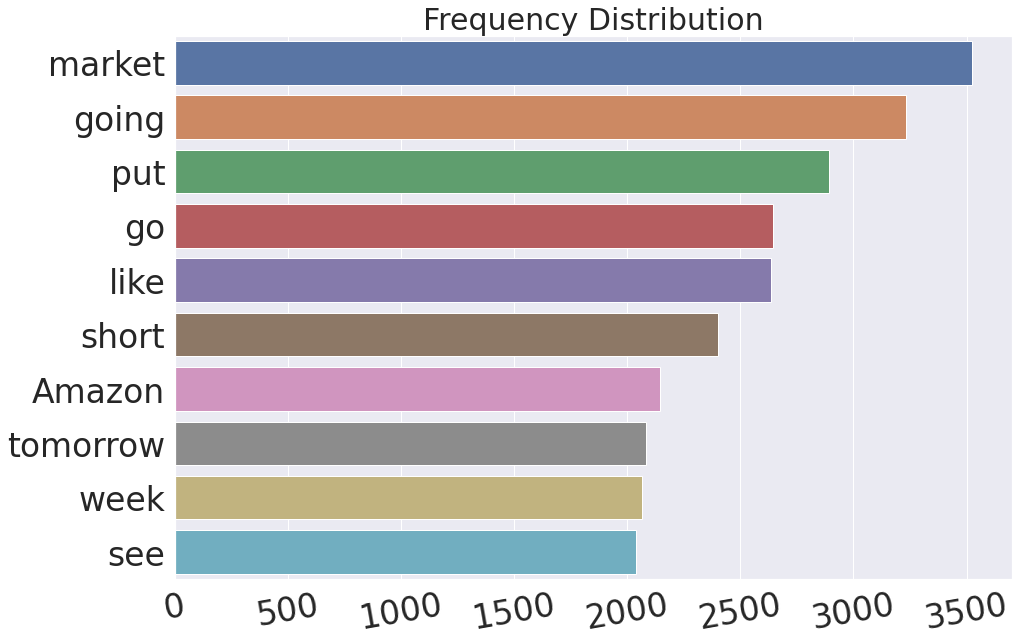

In [ ]:
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(fd_top10))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,10))

#increase font size of all elements
sns.set(font_scale=2)

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, orient='h', ax=ax)
plt.xticks(rotation=10)
plt.title('Frequency Distribution', fontsize=30)
plt.show();

In [53]:
FB_1k2 = FB[:1000]

In [49]:
vnames = [name for name in globals() if globals()[name] is FB_1k2]
print(vnames)

['FB_1k2']


In [30]:
FB_1k.name = "FB1000"

In [38]:
FB_1k.name = str(FB_1k)  

In [ ]:
get_frequency_visual(FB_1k2)

In [ ]:
get_frequency_visual(FB_1k) #1min10s for FB

### Integration 

In [2]:
!pip install emoji==1.7.0

     |████████████████████████████████| 175 kB 11.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=09a7a3c846a6b79d241914c136ff6de7d3bd6e31a6ec1a9486830663fdbf9f60
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
import requests
import pandas as pd
import emoji
import string
import re

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

In [5]:
# To change str to dif format
import ast

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
AAPL = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/AAPL_pre_processed.csv',usecols=['body_preprocessed','sentiment']) #914962

In [12]:
AMZN = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/AMZN_pre_processed.csv',usecols=['body_preprocessed','sentiment']) #539803

In [42]:
FB = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/FB_pre_processed.csv',usecols=['body_preprocessed','sentiment']) #359908

In [14]:
NVDA = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/NVDA_pre_processed.csv',usecols=['body_preprocessed','sentiment']) #584181

In [15]:
TSLA = pd.read_csv('/content/drive/MyDrive/5004 Project/processed/TSLA_pre_processed.csv',usecols=['body_preprocessed','sentiment']) #2204889

In [65]:
nltk.download('stopwords')
stop = stopwords.words('english') + ['cashtag_AAPL','I',"'s",'day','today','get',"n't",'stock','cashtag_AMZN',
                    'cashtag_FB','cashtag_NVDA','cashtag_TSLA','cashtag_SPY','cashtag_QQQ',
                    'cashtag_MSFT','The','This'] + ['cashtag_TWTR','Facebook','FB','company','Facebook','Amazon','Tesla','cashtag_AMD','cashtag_GOOGL','cashtag_SNAP']
                    #+ ['green_apple']
nltk.download('wordnet')
nltk.download('punkt')
punctuation = word_tokenize(string.punctuation) + ['...','.',"'s",'-','’',"”","“"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def get_frequency(file):  
  df = file  
  def pre_process_list(text):
    tokens = nltk.word_tokenize(text)
    tokens = [wnl.lemmatize(word) for word in tokens]
    tokens = [t for t in tokens if t not in stop] 
    tokens = [t for t in tokens if t not in punctuation]
    return(tokens)

  #for bear_list frequency
  bear_list_processed = df[df['sentiment'] == 'Bearish']['body_preprocessed'].apply(lambda x: pre_process_list(x))
  bear_list_processed = bear_list_processed.values.tolist()

  bear_list_processed_onelist = []
  for i in range(len(bear_list_processed)):
    bear_list_processed_onelist.extend(t for t in bear_list_processed[i])

  #for bull_list frequency  
  bull_list_processed = df[df['sentiment'] == 'Bullish']['body_preprocessed'].apply(lambda x: pre_process_list(x))
  bull_list_processed = bull_list_processed.values.tolist()

  bull_list_processed_onelist = []
  for i in range(len(bull_list_processed)):
    bull_list_processed_onelist.extend(t for t in bull_list_processed[i])
  
  #frequency calculate
  fd_bear = nltk.FreqDist(bear_list_processed_onelist)
  fd_bull = nltk.FreqDist(bull_list_processed_onelist)
  print(fd_bear.most_common(10)) 
  print(fd_bull.most_common(10))
  

In [ ]:
get_frequency(AAPL) # 3min28s for 910k dataset

[('market', 7958), ('put', 7148), ('going', 6585), ('go', 5733), ('like', 5660), ('bull', 5658), ('week', 5522), ('Apple', 5495), ('tomorrow', 5124), ('buy', 4695), ('see', 4386), ('sell', 4360), ('back', 4349), ('time', 4253), ('short', 4092), ('next', 4083), ('face_with_tears_of_joy', 3986), ('wa', 3906), ('money', 3616), ('call', 3284), ('ha', 3191), ('rolling_on_the_floor_laughing', 3138), ('bear', 3068), ('apple', 3064), ('coming', 2971), ('drop', 2933), ('quot', 2881), ('people', 2714), ('good', 2701), ('year', 2671)]
[('rocket', 33416), ('Apple', 29741), ('green_apple', 26357), ('buy', 20430), ('week', 19515), ('call', 19466), ('go', 19125), ('like', 17431), ('market', 17172), ('bear', 16559), ('going', 15650), ('tomorrow', 14390), ('time', 14079), ('back', 14073), ('see', 13630), ('next', 13475), ('share', 13299), ('wa', 11969), ('ha', 11293), ('year', 10863), ('good', 10353), ('money', 10282), ('face_with_tears_of_joy', 10126), ('price', 9963), ('money_bag', 9864), ('dip', 982

In [ ]:
get_frequency(AMZN) 

[('market', 3524), ('going', 3233), ('put', 2892), ('go', 2644), ('like', 2636), ('short', 2402), ('Amazon', 2146), ('tomorrow', 2081), ('week', 2067), ('see', 2040), ('sell', 1986), ('time', 1910), ('next', 1904), ('buy', 1878), ('back', 1877), ('wa', 1807), ('ha', 1676), ('bull', 1660), ('call', 1657), ('drop', 1606), ('money', 1534), ('2', 1532), ('company', 1402), ('price', 1398), ('coming', 1295), ('good', 1278), ('big', 1274), ('year', 1254), ('face_with_tears_of_joy', 1250), ('one', 1238)]
[('rocket', 15151), ('Amazon', 14003), ('like', 11078), ('go', 10993), ('buy', 10608), ('market', 10135), ('week', 10133), ('going', 9394), ('call', 9270), ('time', 8949), ('next', 8345), ('ha', 8323), ('see', 8248), ('year', 7788), ('wa', 7742), ('tomorrow', 7518), ('quot', 7398), ('back', 7271), ('share', 7244), ('company', 7203), ('earnings', 6337), ('price', 6269), ('good', 6246), ('one', 5750), ('big', 5581), ('think', 5468), ('would', 5466), ('bear', 5438), ('amp', 5346), ('let', 5220)]


In [ ]:
get_frequency(FB)

[('cashtag_TWTR', 2894), ('Facebook', 2669), ('going', 2481), ('put', 2317), ('like', 2217), ('company', 2143), ('go', 2097), ('FB', 2029), ('market', 1794), ('short', 1699), ('see', 1552), ('time', 1431), ('ha', 1426), ('wa', 1406), ('people', 1400), ('tomorrow', 1372), ('face_with_tears_of_joy', 1363), ('rolling_on_the_floor_laughing', 1356), ('buy', 1351), ('quot', 1334), ('back', 1312), ('sell', 1304), ('week', 1299), ('next', 1273), ('200', 1261), ('money', 1131), ('good', 1067), ('bull', 1060), ('It', 1045), ('think', 1032)]
[('rocket', 9095), ('call', 6945), ('buy', 6623), ('like', 6337), ('Facebook', 5983), ('FB', 5980), ('go', 5934), ('week', 5899), ('going', 5411), ('market', 5407), ('see', 4816), ('time', 4751), ('next', 4691), ('back', 4676), ('ha', 4612), ('tomorrow', 4523), ('company', 4470), ('wa', 4176), ('quot', 4136), ('amp', 4061), ('share', 3719), ('bear', 3640), ('good', 3616), ('short', 3597), ('money', 3529), ('year', 3490), ('cashtag_TWTR', 3461), ('earnings', 3

In [ ]:
get_frequency(NVDA)

[('short', 3280), ('put', 2958), ('cashtag_AMD', 2874), ('going', 2618), ('market', 2593), ('go', 2361), ('like', 2150), ('tomorrow', 1998), ('sell', 1889), ('week', 1887), ('back', 1874), ('see', 1844), ('buy', 1830), ('bull', 1782), ('next', 1775), ('time', 1687), ('wa', 1597), ('drop', 1288), ('good', 1259), ('price', 1231), ('coming', 1178), ('ha', 1146), ('money', 1142), ('NVDA', 1117), ('still', 1069), ('quot', 1059), ('look', 1052), ('think', 1048), ('call', 1037), ('bear', 1004)]
[('cashtag_AMD', 17527), ('rocket', 12009), ('buy', 9859), ('go', 9527), ('call', 8985), ('week', 8837), ('going', 8286), ('like', 8221), ('back', 7454), ('next', 7346), ('market', 7302), ('tomorrow', 7218), ('see', 6875), ('NVDA', 6700), ('time', 6523), ('good', 6229), ('wa', 6072), ('short', 6011), ('bear', 5949), ('long', 5820), ('earnings', 5792), ('share', 5412), ('year', 5180), ('price', 5166), ('ha', 5052), ('dip', 5025), ('Nvidia', 4936), ('company', 4818), ('quot', 4664), ('let', 4458)]


In [ ]:
get_frequency(TSLA)

[('Tesla', 28322), ('bull', 19500), ('going', 19217), ('market', 18375), ('put', 17839), ('like', 16750), ('go', 16143), ('cashtag_SPY', 15982), ('short', 15375), ('Elon', 14460), ('buy', 13707), ('sell', 13556), ('face_with_tears_of_joy', 13295), ('wa', 12898), ('time', 12169), ('quot', 11964), ('ha', 11945), ('week', 11836), ('see', 11647), ('tomorrow', 11627), ('company', 11533), ('price', 11503), ('back', 11493), ('money', 11359), ('The', 11004), ('This', 10936), ('car', 10595), ('next', 9757), ('rolling_on_the_floor_laughing', 9624), ('share', 9582)]
[('rocket', 252910), ('Tesla', 80666), ('bear', 67824), ('go', 48424), ('buy', 46035), ('like', 44868), ('short', 42298), ('going', 40659), ('market', 36878), ('week', 36798), ('share', 35689), ('fire', 34213), ('time', 33848), ('call', 32855), ('see', 32429), ('back', 32401), ('face_with_tears_of_joy', 32253), ('Elon', 31549), ('wa', 31446), ('next', 31020), ('tomorrow', 30707), ('ha', 28889), ('cashtag_NIO', 27967), ('cashtag_SPY', 

#### Visualization 

In [8]:
## Imports
#import nltk.collocations as collocations
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def get_frequency_visual(file):  
  df = file
  df_name = [name for name in globals() if globals()[name] is file]
  def pre_process_list(text):
    tokens = nltk.word_tokenize(text)
    tokens = [wnl.lemmatize(word) for word in tokens]
    tokens = [t for t in tokens if t not in stop] 
    tokens = [t for t in tokens if t not in punctuation]
    return(tokens)

  # For bear_list frequency
  bear_list_processed = df[df['sentiment'] == 'Bearish']['body_preprocessed'].apply(lambda x: pre_process_list(x))
  bear_list_processed = bear_list_processed.values.tolist()

  bear_list_processed_onelist = []
  for i in range(len(bear_list_processed)):
    bear_list_processed_onelist.extend(t for t in bear_list_processed[i])

  # For bull_list frequency  
  bull_list_processed = df[df['sentiment'] == 'Bullish']['body_preprocessed'].apply(lambda x: pre_process_list(x))
  bull_list_processed = bull_list_processed.values.tolist()

  bull_list_processed_onelist = []
  for i in range(len(bull_list_processed)):
    bull_list_processed_onelist.extend(t for t in bull_list_processed[i])
  
  # Frequency calculate
  fd_bear = nltk.FreqDist(bear_list_processed_onelist)
  fd_bull = nltk.FreqDist(bull_list_processed_onelist)
  
  fd_bear_visual = fd_bear.most_common(10)
  fd_bull_visual = fd_bull.most_common(10)
    
  # Conversion to Pandas series via Python Dictionary for easier plotting
  all_fdist_bear = pd.Series(dict(fd_bear_visual))
  all_fdist_bull = pd.Series(dict(fd_bull_visual))

  # Setting figure, ax into variables
  fig1, ax1 = plt.subplots(figsize=(5,5))
  fig2, ax2 = plt.subplots(figsize=(5,5))

  # Increase font size of all elements
  sns.set(font_scale=2)

  # Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
  #all_plot = sns.barplot(x=all_fdist_bear.values, y=all_fdist_bear.index, orient='h', ax=ax1).set_title('Frequency Distribution (Bear)')
  #all_plot = sns.barplot(x=all_fdist_bull.values, y=all_fdist_bull.index, orient='h', ax=ax2).set_title('Frequency Distribution (Bull)')

  all_plot = sns.barplot(x=all_fdist_bear.values, y=all_fdist_bear.index, orient='h', ax=ax1).set_title([df_name,'(Bear)'])
  all_plot = sns.barplot(x=all_fdist_bull.values, y=all_fdist_bull.index, orient='h', ax=ax2).set_title([df_name,'(Bull)'])

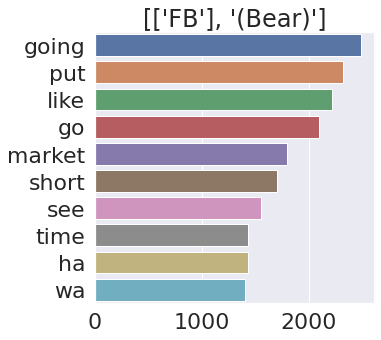

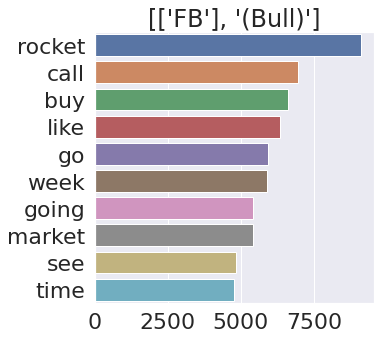

In [60]:
get_frequency_visual(FB) 

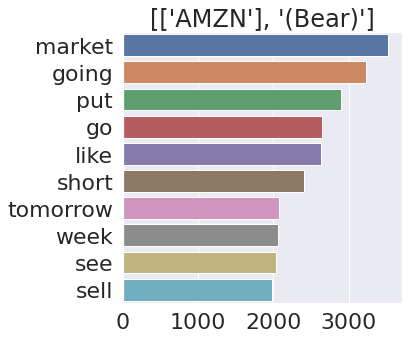

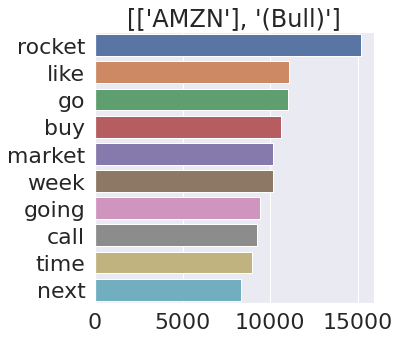

In [61]:
get_frequency_visual(AMZN)

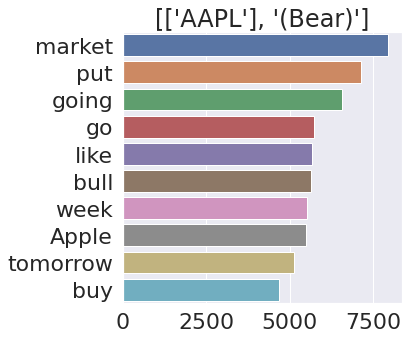

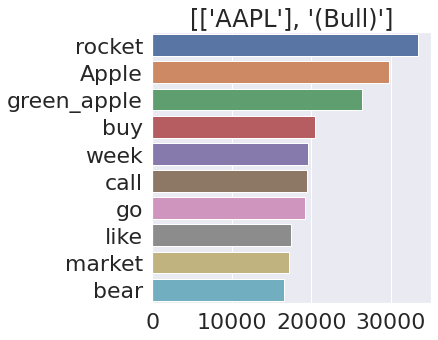

In [67]:
get_frequency_visual(AAPL) 

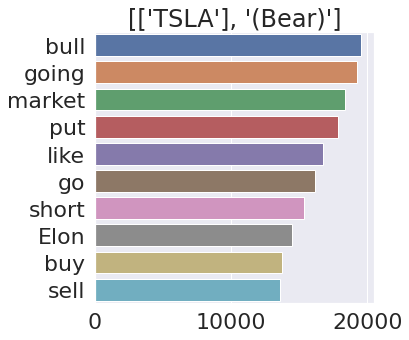

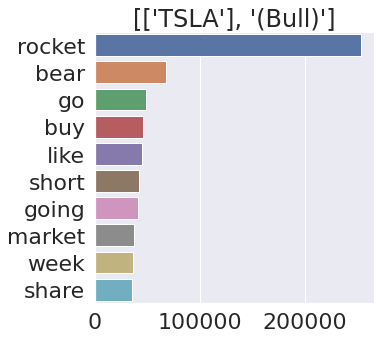

In [64]:
get_frequency_visual(TSLA) 

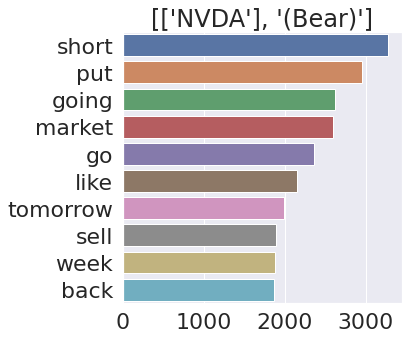

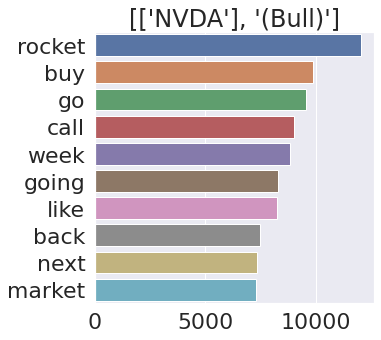

In [63]:
get_frequency_visual(NVDA)